### Step-by-step numerical integration
Tutorial taken from Possell: A Beginner's Guide to Working with Astronomical Data, 2019
    
(all code written in python v3.8)

Herein I was able to predict some basic curves using numerical methods and compared them to known curves (since analytical solutions were known).

Secondary to this, I reproduced Keppler's three laws of planetary motion, but using numerical methods (althouth these can also be done analytically.)

Errors between "theoretical" and experimental values tended to diverge for the first two numerical methods as time evolved over a long period.  However, they were good models for short ranges.

COMPUTER SETUP: Mac OS 11.  Editor: Jupyter Notebook and Atom.  Plots produced in Jupyter.

Collaboration: 3-4 of us worked together over much of the coding.  The group effort was essential to tease out idiosyncrasies in the code, and made it much more fun.

### 11.1  Euler's method

Text(0.5, 1.0, 'Numerical prediction of sine curve')

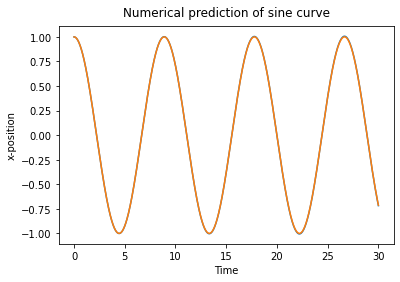

In [99]:
import numpy as np
import matplotlib.pyplot as plt

#Constants
k = 0.5
m = 1.0
numberOfSteps = 30000
DeltaT = 0.001

#This is how we parse out time for horizontal axis
tCollector=np.linspace(0,numberOfSteps*DeltaT, numberOfSteps+1)

# Analytical solution to the differential equation:
#note, the constant 9.549297 was found by trial-and-error.
#Its purpose is to force the array to be of length 30001 so it matches the shape of "time" array, otherwise it won't plot.
x_theo = np.arange(0,np.pi*9.549297,DeltaT)
y_theo = np.cos(((k/m)**.5)*x_theo)

# Initial Conditions for numerical calculations
xCollector=[1.0]
vCollector=[0]

#this loop is the heart of the code, it serves the purpose of integrating over infinitesimal intervals,
#by making steps of 0.001, which are pretty small.
for ii in range(numberOfSteps):
    xNew = xCollector[-1] + vCollector[-1]*DeltaT
    vNew = vCollector[-1] + (-k/m*xCollector[-1])*DeltaT
    xCollector.append(xNew)
    vCollector.append(vNew)

#Here the analytical and numerical solutions are plotted on the same figure.
#As can be seen, they lay (almost) exactly on top of eachother.
plt.plot(tCollector,xCollector, label='numerical')
plt.plot(x_theo,y_theo, label='analytical')
plt.xlabel('Time')
plt.ylabel('x-position')
plt.title('Numerical prediction of sine curve', pad=10)

### 11.2 Numerical errors in Euler's method vs. known values
This is a very simple calculation: just subtracting the numerical (xCollector) values from analytical (y_theo), and plotting that against an arbitratry time scale.
It is easily seen that as the function evolves the analytical and numerical values diverge greatly, hence the roughness of the Euler method. 

Text(0.5, 0, 'Time')

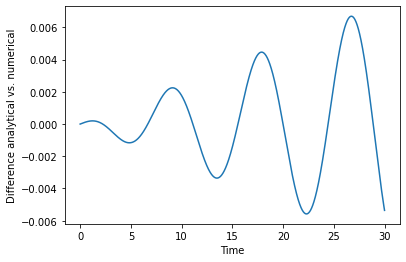

In [68]:
#figure 102
diff = xCollector-y_theo

#plt.plot (tCollector,diff)

plt.plot(tCollector,diff)
plt.ylabel('Difference analytical vs. numerical')
plt.xlabel('Time')

### 11.3 Velocity Verlet Algorithm
(an improvement to Euler's method)

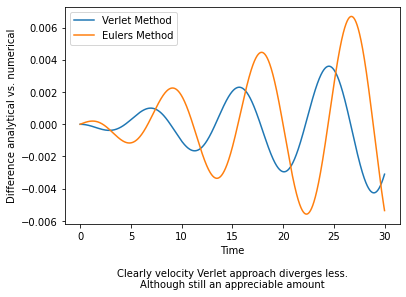

In [100]:
#Figure 103
k=0.5
m=1.0
numberOfSteps = 30000
DeltaT = 0.001
tCollector=np.linspace(0,numberOfSteps*DeltaT,numberOfSteps+1)
# Initial conditions:
xCollectorVV=[1.0]
vCollectorVV=[0]
for ii in range(numberOfSteps):
    vHalf = vCollectorVV[-1] + 0.5*DeltaT*(-k/m*xCollectorVV[-1])
    xNew = xCollectorVV[-1] + DeltaT*vHalf
    vNew = vHalf + 0.5*DeltaT*(-k/m*xNew)
    xCollectorVV.append(xNew)
    vCollectorVV.append(vNew)
    
diffVV = (xCollectorVV-y_theo)*10**4

#plot the error in Verlet method    
plt.plot(tCollector,diffVV, label = 'Verlet Method')

#plot the error in Euler's method, on the same figure for comparison
plt.plot(tCollector,diff, label = 'Eulers Method')
plt.ylabel('Difference analytical vs. numerical')
plt.xlabel('Time\n\nClearly velocity Verlet approach diverges less.\nAlthough still an appreciable amount')
plt.legend()

### 11.4  Now, let's try to show Keppler's laws using numerical methods.
Start by calculating a basic orbit.

### Kepler’s first law:
The orbit of a planet orbiting a central mass is an ellipse, with the central mass in one of the focal points.

Text(0.5, 0, 'One ellipse directly on top of the other')

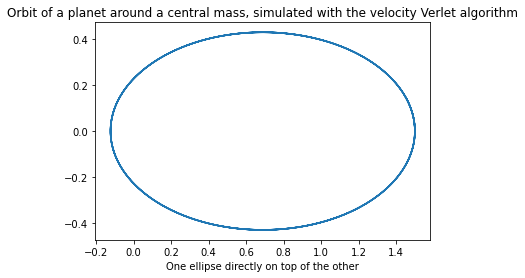

In [101]:
# 11.4 A Simple two-dimensional simulation.  Figure 105

numberOfSteps = 30000
DeltaT = 0.0001
accFac = 39.48 # Corresponding to one solar mass, in au per square year
tCollector=np.linspace(0,numberOfSteps*DeltaT,numberOfSteps+1)
# Initial conditions:
xCollector=[1.5]
vxCollector=[0]
yCollector=[0.0]
vyCollector=[2.0]
for ii in range(numberOfSteps):
    rNow = np.sqrt(xCollector[-1]**2+yCollector[-1]**2)
    accNow = -accFac/rNow**2
    accNowx = accNow*xCollector[-1]/rNow
    accNowy = accNow*yCollector[-1]/rNow
    vxHalf = vxCollector[-1] + 0.5*DeltaT*accNowx
    vyHalf = vyCollector[-1] + 0.5*DeltaT*accNowy
    xNew = xCollector[-1] + DeltaT*vxHalf
    yNew = yCollector[-1] + DeltaT*vyHalf
    rNew = np.sqrt(xNew**2 + yNew**2)
    accNew = -accFac/rNew**2
    accNewx = accNew*xNew/rNew
    accNewy = accNew*yNew/rNew
    vxNew = vxHalf + 0.5*DeltaT*accNewx
    vyNew = vyHalf + 0.5*DeltaT*accNewy
    xCollector.append(xNew)
    yCollector.append(yNew)
    vxCollector.append(vxNew)
    vyCollector.append(vyNew)

#here we just plot the "stepped" x and y values per Verlet algorithm
plt.plot(xCollector,yCollector, label = 'orbit')
plt.title('Orbit of a planet around a central mass, simulated with the velocity Verlet algorithm')
plt.xlabel('One ellipse directly on top of the other')

### Analyze the error in above orbit
Notice below how the errors are periodic, as would be expected.  In addition, on the scale shown they are indeed very small, 0.0004 au, and less.

Text(0.5, 0, 'Radial difference in au')

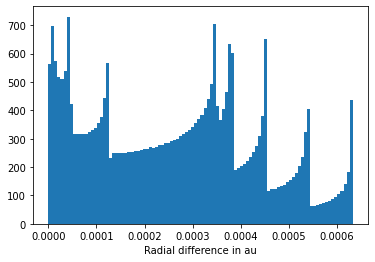

In [90]:
# Figure 106

a = 1.623/2 # semi-major axis
e = 0.848 # eccentricity
b = 0.860 # minor half axis

theta = np.linspace(0,2*np.pi, 30001)

#polar coordinate equation for an ellipse
r = a*(1-e**2)/(1+e*np.cos(theta))

diffCollector=[]
for x,y in zip(xCollector,yCollector):
    r=np.sqrt(x**2+y**2)
    theta = np.arctan2(y,x)
    anr = a*(1-e**2)/(1-e*np.cos(theta))
    diffr = np.sqrt((r-anr)**2)
    diffCollector.append(diffr)
    
plt.hist(diffCollector, bins=100)
plt.xlabel('Radial difference in au')
#plt.xlim(0.000,0.0004)

### Keppler's 2nd law:
A planet moves in its ellipse so that the line between it and the Sun placed at a focus sweeps out equal areas in equal times

Text(0.5, 1.0, 'Histogram of the relative difference from the average of the triangle areas corresponding to each time step')

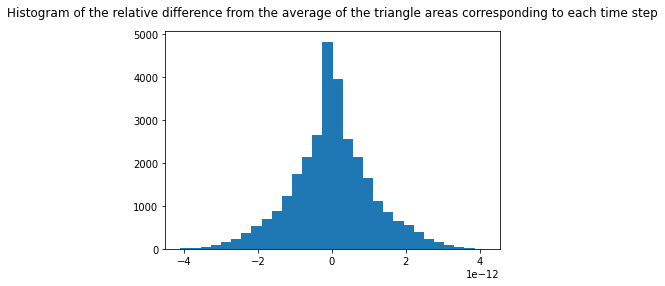

In [96]:
# Figure 107

areaCollector=np.array([])
for x1, x2, y1, y2 in zip(xCollector[1:],
    xCollector[:-1],yCollector[1:], yCollector[:-1]):
    a = np.sqrt(x1**2+y1**2)
    b = np.sqrt(x2**2+y2**2)
    c = np.sqrt((x1-x2)**2+(y1-y2)**2)
    s = 0.5*(a+b+c)
    A = np.sqrt(s*(s-a)*(s-b)*(s-c))
    areaCollector = np.append(areaCollector,A)
averageArea=np.average(areaCollector)
relativeDiff = (areaCollector-averageArea)/averageArea

plt.hist(relativeDiff, bins=30)
plt.title('Histogram of the relative difference from the average of the triangle areas corresponding to each time step', pad=15)

### Keppler's third law:
The square of a planet's orbital period is proportional to the cube of the length of the semi-major axis of its orbit.

### First, check the motion against time.
See in figure 108, it is unsurprisingly periodic!

Text(0.5, 0, 'Time in years')

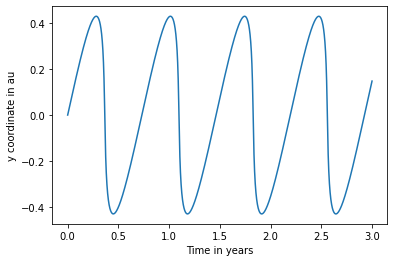

In [102]:
# Figure 108

DeltaT = 0.0001
tCollector=np.linspace(0,numberOfSteps*DeltaT,numberOfSteps+1)

plt.plot(tCollector,yCollector)
plt.ylabel('y coordinate in au')
plt.xlabel('Time in years')

### Next: discover what the actual period is.
Notice, a first "guess" was 0.8 year.  And this produces a looping curve which is clearly out of phase.
Second, the (finally discovered) correct period of 0.713 year was plugged in, and voilà!  It is in phase.

Text(0.5, 0, 'Phase (corrected to 0.7313)\n\nNotice how the 4 loops are now all on top of eachother, making one single curve.')

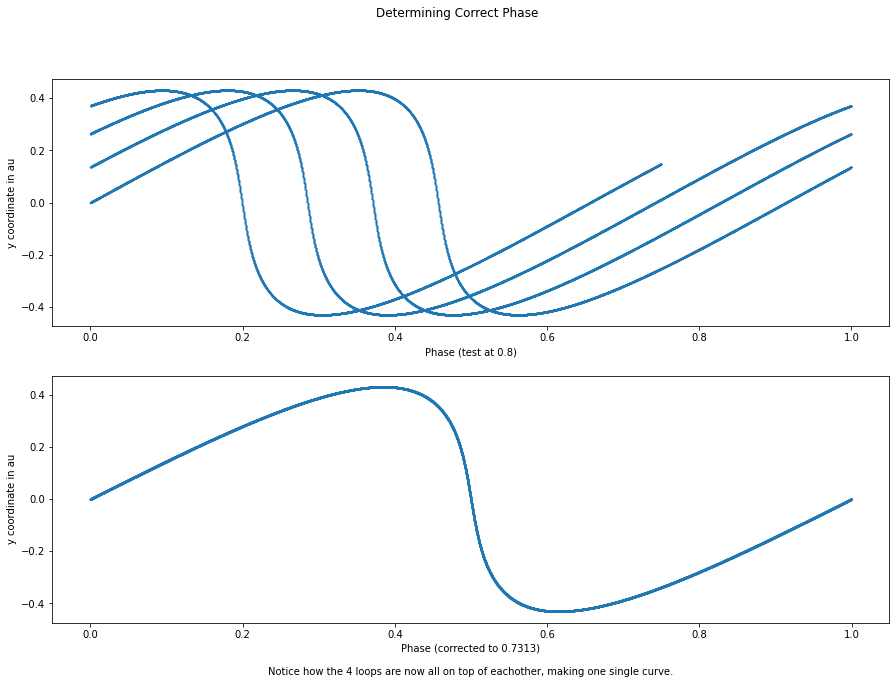

In [64]:
# Figure 109
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib widget

a = 1.623/2
numberOfSteps = 30000
DeltaT = 0.0001
tCollector=np.linspace(0,numberOfSteps*DeltaT,numberOfSteps+1)


#a=1.623/2

phase = (tCollector)/(.8)
phase_numpy = np.array(phase)
phase_mod = phase_numpy%1

phase_real = (tCollector)/(.7313)
phase_numpy_r = np.array(phase_real)
phase_mod_r = phase_numpy_r%1

#plt.scatter(phase_mod,yCollector, s=0.5)
#plt.title("Figure 109", pad=20)
#plt.ylabel('y-values')
#plt.xlabel('Phase')

fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth (15)
fig.suptitle('Determining Correct Phase')
ax1.scatter(phase_mod,yCollector, s=0.5)
ax1.set_ylabel('y coordinate in au')
ax1.set_xlabel('Phase (test at 0.8)')
ax2.scatter(phase_mod_r,yCollector,s=.5)
ax2.set_ylabel('y coordinate in au')
ax2.set_xlabel('Phase (corrected to 0.7313)\n\nNotice how the 4 loops are now all on top of eachother, making one single curve.')

### Finally, test the theory:
(a^3)/(T^2) =  GM 4π2: where a is the major elliptical half axis, and T is the period.

Given values arrived at above for a and T: (a^3)*[(1/T)^2] = 0.99991.  This is pretty close!  One part in 10,000.